In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [7]:
df=pd.read_csv(r"C:\Users\RAVINDRA MANDAL\Desktop\Web Programing\Project\Inlight global pvt ltd\Fake News Detection Model Using Tensorflow\news.csv")

In [8]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
df.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fell

### Most fake news datasets

In [18]:
df = df[['text', 'label']]

### Encode Target Labels
* FAKE=0
* REAL=1

In [11]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

print(df['label'].value_counts())

label
1    3171
0    3164
Name: count, dtype: int64


### Train–Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42
)

### Text Tokenization & Padding

In [14]:
VOCAB_SIZE = 10000
MAX_LENGTH = 300
OOV_TOKEN = "<OOV>"

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post')


### Build Deep Learning Model (LSTM)

In [15]:
model = Sequential([
    Embedding(VOCAB_SIZE, 128, input_length=MAX_LENGTH),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
#complie the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
#train the model
history = model.fit(
    X_train_pad,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 817ms/step - accuracy: 0.7136 - loss: 0.5851 - val_accuracy: 0.8077 - val_loss: 0.4391
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 809ms/step - accuracy: 0.8483 - loss: 0.3807 - val_accuracy: 0.7485 - val_loss: 0.4817
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 791ms/step - accuracy: 0.8809 - loss: 0.2847 - val_accuracy: 0.8294 - val_loss: 0.3854
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 810ms/step - accuracy: 0.9087 - loss: 0.2055 - val_accuracy: 0.8116 - val_loss: 0.4550
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 814ms/step - accuracy: 0.9171 - loss: 0.1796 - val_accuracy: 0.8156 - val_loss: 0.4288


In [19]:
#evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)

print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.8185 - loss: 0.4967
Test Accuracy: 0.8184688091278076


### Plot Training Accuracy & Loss

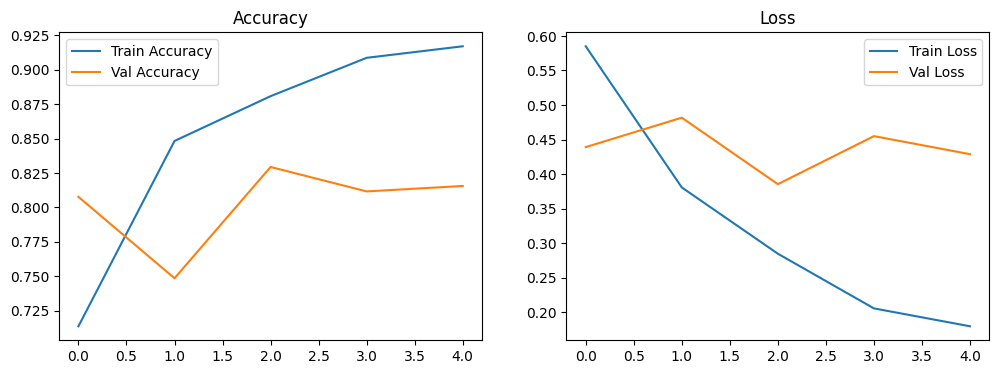

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

### Predict Fake or Real News

In [21]:
def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAX_LENGTH, padding='post')
    pred = model.predict(pad)[0][0]
    
    if pred >= 0.5:
        return "REAL NEWS 🟢"
    else:
        return "FAKE NEWS 🔴"


sample_text = "The government has announced a new economic policy today."
print(predict_news(sample_text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
FAKE NEWS 🔴


### Model Output

0 → FAKE NEWS

1 → REAL NEWS

Expected accuracy: 90%+ (dataset dependent)